<a href="https://colab.research.google.com/github/nagelex/adhd_scales_ml/blob/main/adhd_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing



## 1. Data curation


1. reading the file, looking for N/A values
2. renaming and dropping non-used columns
2. addition of scores for innatentiveness, hyperactivity (motor and verbal) based on the original dichotomic rules

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#uploading the  excel sheet with table
data = pd.read_excel('/content/Attention Based Questionnaire.xlsx', sheet_name = 'Sheet4')

In [ ]:
data.head(5)

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,"1. How 3 do you have trouble wrapping up the final details of a project, once the challenging parts have been done?",2. How 3 do you have difficulty getting things in order when you have to do a task that requires organization?,3. How 3 do you have problems remembering appointments or obligations?,...,Inattentiveness,Hyperactivity (verbal),Heperactivity (Motor),Part A lvl,Part B lvl,Total,label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1
0,18,2,1,1,4,4,1,2,2,2,...,18,10,8,mild or moderate,mild or moderate,mild or moderate,0,NaN,NaN,NaN
1,19,2,2,1,3,4,2,2,2,2,...,18,9,8,high,mild or moderate,mild or moderate,1,NaN,NaN,NaN
2,18,1,1,4,3,3,2,0,0,0,...,6,12,2,mild or moderate,mild or moderate,low,0,NaN,NaN,NaN
3,19,1,1,1,3,3,1,2,1,1,...,15,6,1,mild or moderate,low,low,0,NaN,NaN,NaN
4,18,2,0,2,1,1,1,1,2,2,...,17,10,8,mild or moderate,mild or moderate,mild or moderate,0,NaN,NaN,NaN


In [ ]:
print(data.columns)

Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar',
       '1. How 3 do you have trouble wrapping up the final details of a project, once the challenging parts have been done?  ',
       '2. How 3 do you have difficulty getting things in order when you have to do a task that requires organization? ',
       '3. How 3 do you have problems remembering appointments or obligations? ',
       '4. When you have a task that required a lot of thought, how 3 do you avoid or delay getting started?',
       '5. How 3 do you fidget or squirm with your hands or feet when you have to sit down for a long time? ',
       '6. How 3 do you feel overly active and compelled to do things, like you were driven by a motor? ',
       '7. How 3 do you make careless mistakes when you have to work on a boring or difficult project?',
       '8. How 3 do you have difficulty keeping your attention when you are doing bori

In [ ]:
data.info() #we look for the n/a values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 42 columns):
 #   Column                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                            --------------  -----  
 0   Age                                                                                                                                                               360 non-null    int64  
 1   Gender                                                                                                                                                            360 non-null    int64  
 2   No of Siblings                                                                                                                

In [ ]:
##renaming the columns

new_columns = {
    '1. How 3 do you have trouble wrapping up the final details of a project, once the challenging parts have been done?  ': '1',
    '2. How 3 do you have difficulty getting things in order when you have to do a task that requires organization? ': '2',
    '3. How 3 do you have problems remembering appointments or obligations? ': '3',
    '4. When you have a task that required a lot of thought, how 3 do you avoid or delay getting started?': '4',
    '5. How 3 do you fidget or squirm with your hands or feet when you have to sit down for a long time? ': '5',
    '6. How 3 do you feel overly active and compelled to do things, like you were driven by a motor? ': '6',
    '7. How 3 do you make careless mistakes when you have to work on a boring or difficult project?': '7',
    '8. How 3 do you have difficulty keeping your attention when you are doing boring or repetitive work?': '8',
    '9. How 3 do you have difficulty concentrating on what people say to you, even when they are speaking to you directly?': '9',
    '10. How 3 do you misplace or have difficulty finding things at home or at work?': '10',
    '11. How 3 are you distracted by activity or noise around you?': '11',
    '12. How 3 do you leave your seat in meetings or other situations in which you are expected to remain seated?': '12',
    '13. How 3 do you feel restless or fidgety?': '13',
    '14. How 3 do you have difficulty unwinding and relaxing when you have time to yourself?': '14',
    '15. How 3 do you find yourself talking too much when you are in social situations?': '15',
    '16. When you’re in a conversation, how 3 do you find yourself finishing the sentences of the people you are talking to, before they can finish them themselves? ': '16',
    '17. How 3 do you have difficulty waiting your turn in situations when turn taking is required?': '17',
    '18. How 3 do you interrupt others when they are busy?': '18',
    '1_6 Score': '1_6 Score'
}

data = data.rename(columns=new_columns)
data.columns


Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1_6 Score',
       '7_12 Score', '13_18 Score', '1_18 score', '1-6 sum', '7-18 sum',
       '1-18 (total)', 'Inattentiveness', 'Hyperactivity (verbal)',
       'Heperactivity (Motor)', 'Part A lvl', 'Part B lvl', 'Total', 'label',
       'Inattentiveness.1', 'Hyperactivity (verbal).1',
       'Heperactivity (Motor).1'],
      dtype='object')

In [ ]:
data.drop(columns=['1_6 Score','7_12 Score', '13_18 Score', '1_18 score'], inplace=True)

In [ ]:
data.columns

Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1-6 sum',
       '7-18 sum', '1-18 (total)', 'Inattentiveness', 'Hyperactivity (verbal)',
       'Heperactivity (Motor)', 'Part A lvl', 'Part B lvl', 'Total', 'label',
       'Inattentiveness.1', 'Hyperactivity (verbal).1',
       'Heperactivity (Motor).1'],
      dtype='object')

In [ ]:
new_column = {
    'Heperactivity (Motor)': 'Hyperactivity (Motor).1'
}

data = data.rename(columns=new_columns)
data.columns

Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1-6 sum',
       '7-18 sum', '1-18 (total)', 'Inattentiveness', 'Hyperactivity (verbal)',
       'Heperactivity (Motor)', 'Part A lvl', 'Part B lvl', 'Total', 'label',
       'Inattentiveness.1', 'Hyperactivity (verbal).1',
       'Heperactivity (Motor).1'],
      dtype='object')

decoding based on the information from scale description [tables](https://novopsych.com.au/wp-content/uploads/2023/03/Adult-ADHD-Self-Report-Scale-ASRS-V1.1.pdf)


In [ ]:
# inattentiveness: sum of the questions 1, 2, 3, 4, 7, 8, 9, 10, 11
#--> items 1,2,3,9 (if number is more than 2 - decoding as 1, if no - 0  )
#--> items 4,7,8,10,11(if number is more than 3 -  decoding as 1, if no - 0)
#hyperactivity (verbal): sum of the questions 5, 6, 12, 13, 14
#--> items 5,6,13,14 (if number is more than 3 -  decoding as 1, if no - 0)
#--> item 12  (if number is more than 2 - decoding as 0, if no - 0)
#hyperactivity (motor): sum of the questions 15, 16, 17, 18
#-->items 15,17 (if number is more than 3 -  decoding as 1, if no - 0)
#-->items 16, 18 (if number is more than 2 - decoding as 0, if no - 0)

# loop for each row
for index, row in data.iterrows():
    inattentiveness_score = 0
    hyperactivity_verbal_score = 0
    hyperactivity_motor_score = 0

    # Inattentiveness
    for col in ['1', '2', '3', '9']:
        if row[col] > 2:
            inattentiveness_score += 1
    for col in ['4', '7', '8', '10', '11']:
        if row[col] > 3:
            inattentiveness_score += 1

    # Hyperactivity (verbal)
    for col in ['5', '6', '13', '14']:
        if row[col] > 3:
            hyperactivity_verbal_score += 1
    if row['12'] > 2:
      hyperactivity_verbal_score += 1

    # Hyperactivity (motor)
    for col in ['15', '17']:
        if row[col] > 3:
            hyperactivity_motor_score += 1
    for col in ['16', '18']:
        if row[col] > 2:
            hyperactivity_motor_score += 1

    data.loc[index, 'Inattentiveness.1'] = inattentiveness_score
    data.loc[index, 'Hyperactivity (verbal).1'] = hyperactivity_verbal_score
    data.loc[index, 'Heperactivity (Motor).1'] = hyperactivity_motor_score

In [ ]:
data.head(50)

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,1,2,3,...,Inattentiveness,Hyperactivity (verbal),Heperactivity (Motor),Part A lvl,Part B lvl,Total,label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1
0,18,2,1,1,4,4,1,2,2,2,...,18,10,8,mild or moderate,mild or moderate,mild or moderate,0,0.0,0.0,0.0
1,19,2,2,1,3,4,2,2,2,2,...,18,9,8,high,mild or moderate,mild or moderate,1,0.0,0.0,0.0
2,18,1,1,4,3,3,2,0,0,0,...,6,12,2,mild or moderate,mild or moderate,low,0,0.0,3.0,0.0
3,19,1,1,1,3,3,1,2,1,1,...,15,6,1,mild or moderate,low,low,0,0.0,0.0,0.0
4,18,2,0,2,1,1,1,1,2,2,...,17,10,8,mild or moderate,mild or moderate,mild or moderate,0,0.0,0.0,0.0
5,18,2,0,2,2,1,1,2,3,2,...,19,12,10,mild or moderate,high,mild or moderate,1,1.0,1.0,1.0
6,23,2,5,2,3,0,2,1,2,2,...,15,3,13,mild or moderate,mild or moderate,mild or moderate,0,0.0,1.0,3.0
7,18,2,4,1,3,2,2,2,3,2,...,17,1,8,mild or moderate,low,low,0,2.0,0.0,2.0
8,18,2,3,2,2,1,1,3,3,2,...,18,10,8,mild or moderate,mild or moderate,mild or moderate,0,2.0,0.0,0.0
9,18,2,1,1,1,2,1,1,0,2,...,12,16,7,mild or moderate,mild or moderate,mild or moderate,0,0.0,3.0,0.0


In [ ]:
data.drop(columns= ['Inattentiveness', 'Hyperactivity (verbal)',
       'Heperactivity (Motor)'], inplace = True)

In [ ]:
data.head(5)

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,1,2,3,...,1-6 sum,7-18 sum,1-18 (total),Part A lvl,Part B lvl,Total,label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1
0,18,2,1,1,4,4,1,2,2,2,...,12,24,36,mild or moderate,mild or moderate,mild or moderate,0,0.0,0.0,0.0
1,19,2,2,1,3,4,2,2,2,2,...,14,21,35,high,mild or moderate,mild or moderate,1,0.0,0.0,0.0
2,18,1,1,4,3,3,2,0,0,0,...,0,20,20,mild or moderate,mild or moderate,low,0,0.0,3.0,0.0
3,19,1,1,1,3,3,1,2,1,1,...,9,13,22,mild or moderate,low,low,0,0.0,0.0,0.0
4,18,2,0,2,1,1,1,1,2,2,...,11,24,35,mild or moderate,mild or moderate,mild or moderate,0,0.0,0.0,0.0


##Exploratory Data Analysis

Since the dataset was obtained from the research paper, there was a perivious statistical description of it.
FeaturesSymptom scores prepared in the previous step will be analyzed and described in this section as a part of existing dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       360 non-null    int64  
 1   Gender                    360 non-null    int64  
 2   No of Siblings            360 non-null    int64  
 3   Family Type               360 non-null    int64  
 4   Father education level    360 non-null    int64  
 5   Mother education level    360 non-null    int64  
 6   Hosteler/Day scholar      360 non-null    int64  
 7   1                         360 non-null    int64  
 8   2                         360 non-null    int64  
 9   3                         360 non-null    int64  
 10  4                         360 non-null    int64  
 11  5                         360 non-null    int64  
 12  6                         360 non-null    int64  
 13  7                         360 non-null    int64  
 14  8         

In [ ]:
data.describe()

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,1,2,3,...,16,17,18,1-6 sum,7-18 sum,1-18 (total),label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,18.855556,1.366667,1.477778,1.727778,2.641667,2.447222,1.411111,1.530556,1.550000,1.377778,...,1.497222,1.544444,0.941667,9.641667,18.922222,28.563889,0.172222,0.950000,0.386111,0.341667
std,1.224732,0.482565,1.083971,0.972207,0.954063,1.077753,0.492720,0.972697,0.963252,1.056380,...,1.028829,1.080711,1.014896,3.924345,7.332878,10.445045,0.378099,1.497537,0.788727,0.657028
min,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,7.000000,14.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,10.000000,19.000000,29.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,12.000000,24.000000,35.000000,0.000000,1.250000,1.000000,1.000000
max,23.000000,2.000000,7.000000,5.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,24.000000,48.000000,72.000000,1.000000,9.000000,5.000000,4.000000


<ipython-input-16-1880177789>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["1-18 (total)"], kde=False)


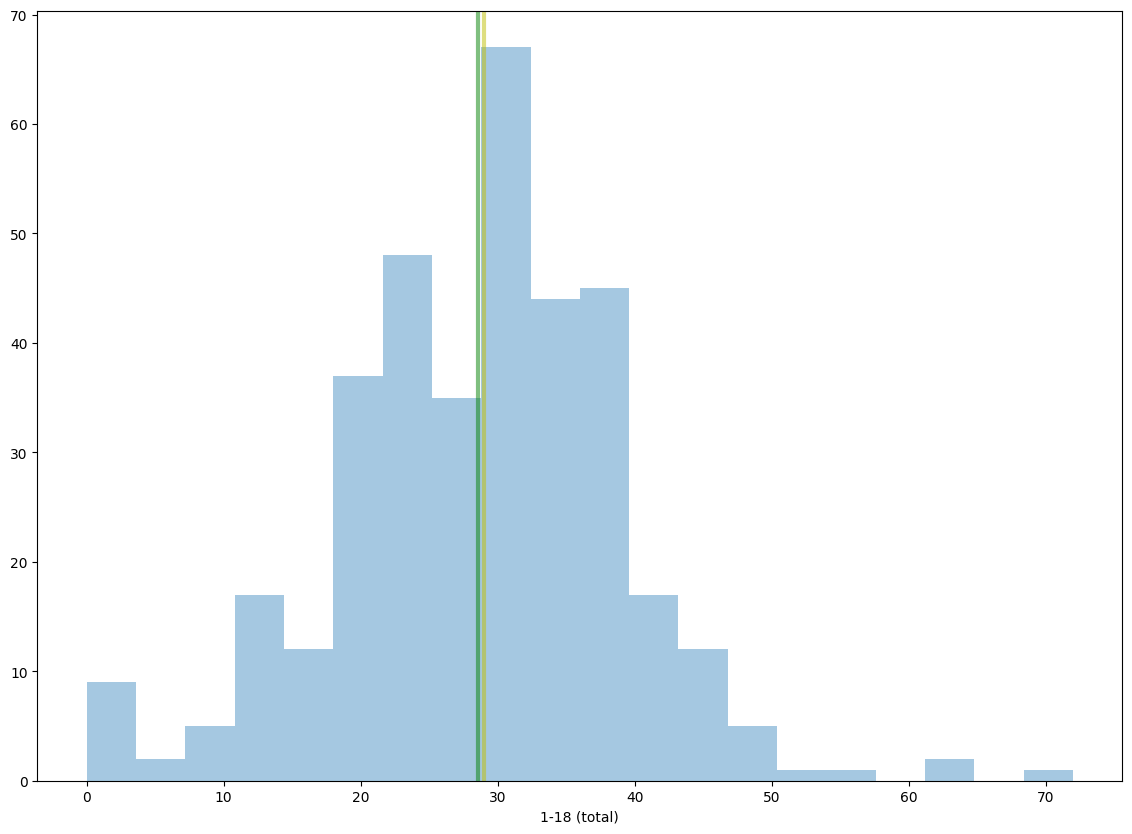

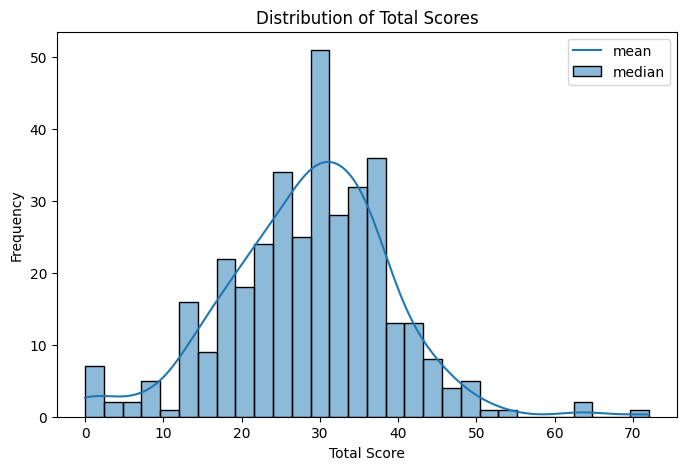

In [ ]:
plt.figure(figsize = (14,10))

sns.distplot(data["1-18 (total)"], kde=False)

plt.axvline(x=data["1-18 (total)"].mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=data["1-18 (total)"].median(), linewidth=3, color='y', label="median", alpha=0.5)

plt.figure(figsize = (8,5))
sns.histplot (data["1-18 (total)"], bins = 30,kde = True)
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Distribution of Total Scores')
plt.legend(["mean", "median"])
plt.show()


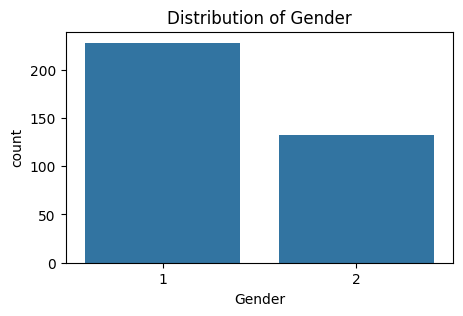

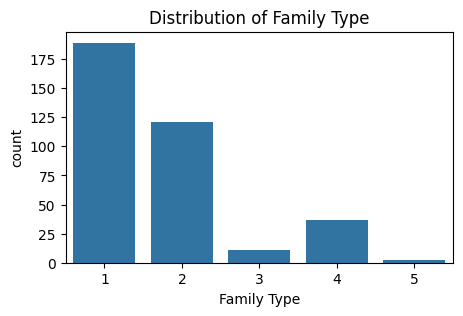

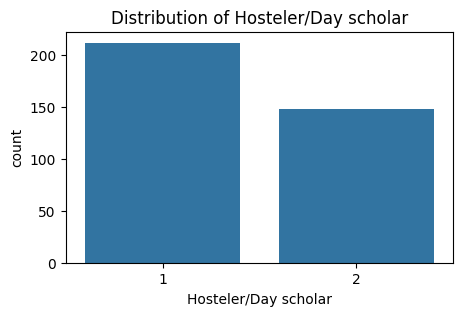

In [ ]:
for col in ['Gender', 'Family Type', 'Hosteler/Day scholar']:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
data['label'].value_counts()

,count
label,
0,298
1,62


In [ ]:
#decoding the symptom severity to the numbers
data['Part A lvl'] = data['Part A lvl'].map({'low': 0, 'mild or moderate': 1, 'high': 2, 'very high': 3})
data['Part B lvl'] = data['Part B lvl'].map({'low': 0, 'mild or moderate': 1, 'high': 2, 'very high': 3})
data['Total'] = data['Total'].map({'low': 0, 'mild or moderate': 1, 'high': 2, 'very high': 3})

In [ ]:
data.head(5)

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,1,2,3,...,1-6 sum,7-18 sum,1-18 (total),Part A lvl,Part B lvl,Total,label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1
0,18,2,1,1,4,4,1,2,2,2,...,12,24,36,1,1,1,0,0.0,0.0,0.0
1,19,2,2,1,3,4,2,2,2,2,...,14,21,35,2,1,1,1,0.0,0.0,0.0
2,18,1,1,4,3,3,2,0,0,0,...,0,20,20,1,1,0,0,0.0,3.0,0.0
3,19,1,1,1,3,3,1,2,1,1,...,9,13,22,1,0,0,0,0.0,0.0,0.0
4,18,2,0,2,1,1,1,1,2,2,...,11,24,35,1,1,1,0,0.0,0.0,0.0


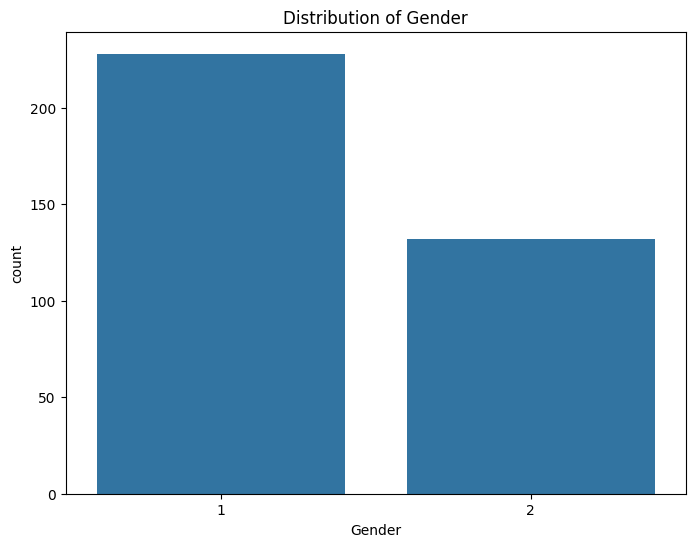

Value counts for Gender:
Gender
1    228
2    132
Name: count, dtype: int64



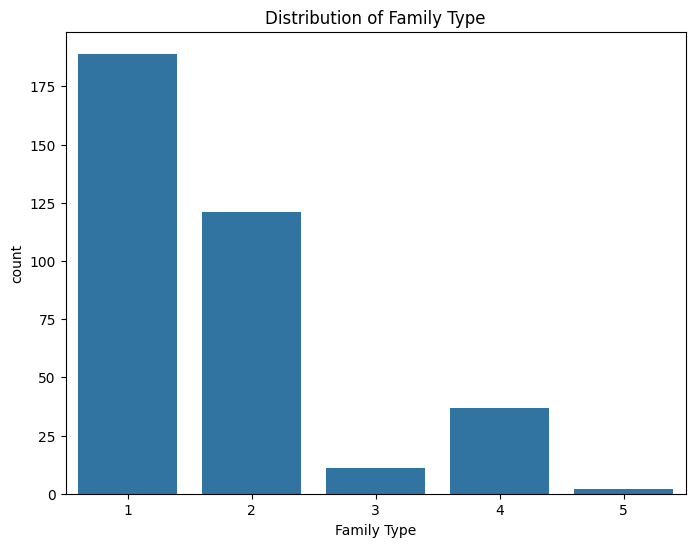

Value counts for Family Type:
Family Type
1    189
2    121
4     37
3     11
5      2
Name: count, dtype: int64



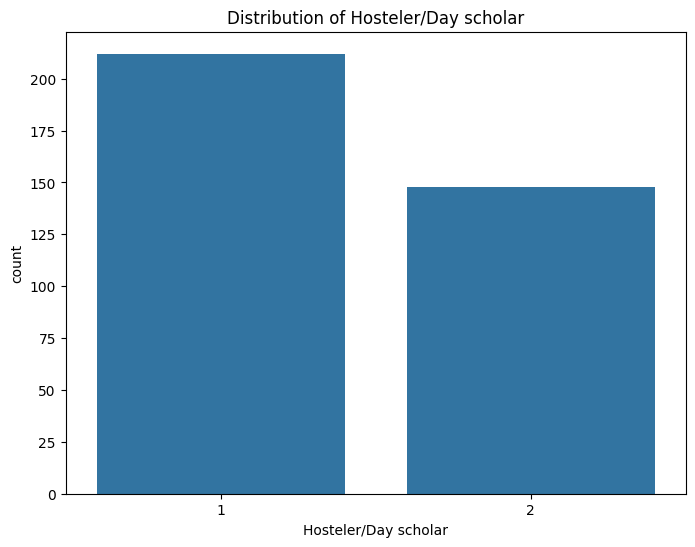

Value counts for Hosteler/Day scholar:
Hosteler/Day scholar
1    212
2    148
Name: count, dtype: int64



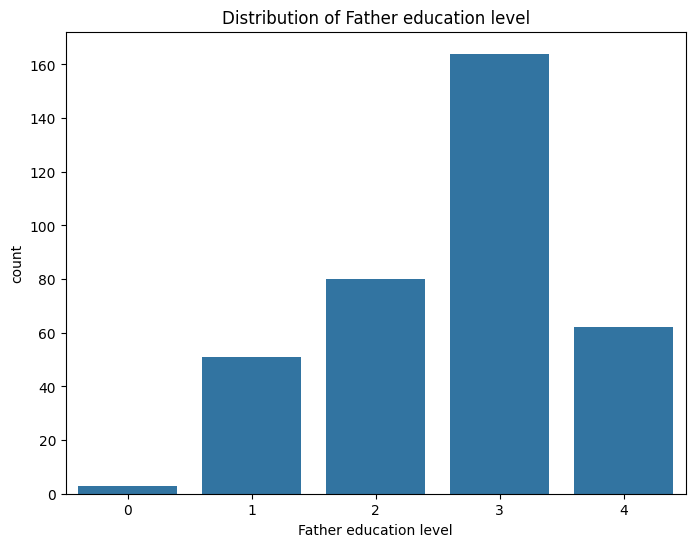

Value counts for Father education level:
Father education level
3    164
2     80
4     62
1     51
0      3
Name: count, dtype: int64



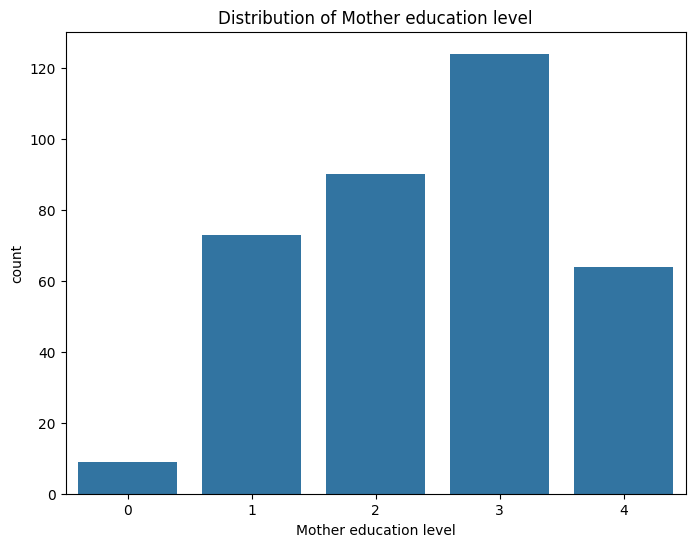

Value counts for Mother education level:
Mother education level
3    124
2     90
1     73
4     64
0      9
Name: count, dtype: int64



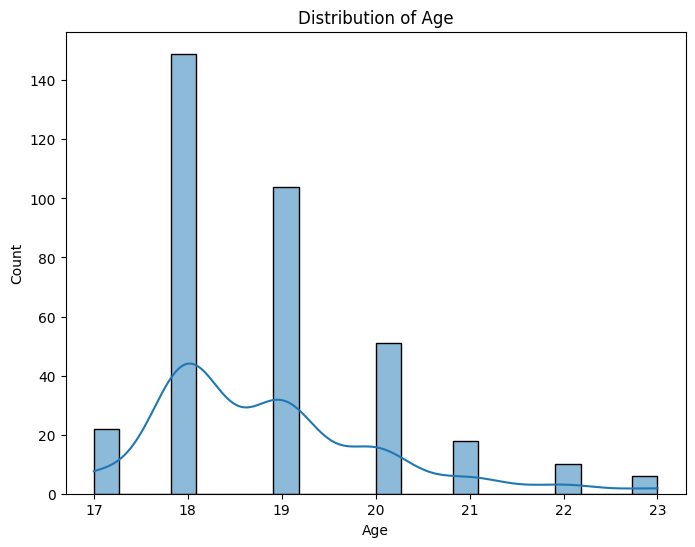

Descriptive statistics for Age:
count    360.000000
mean      18.855556
std        1.224732
min       17.000000
25%       18.000000
50%       19.000000
75%       19.000000
max       23.000000
Name: Age, dtype: float64



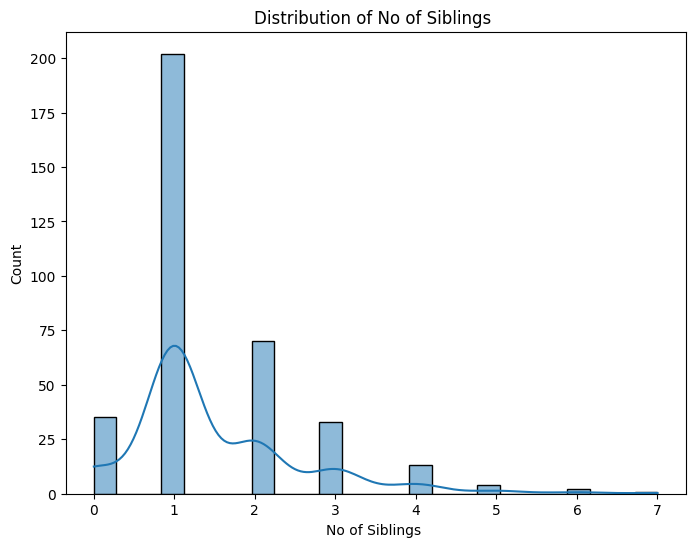

Descriptive statistics for No of Siblings :
count    360.000000
mean       1.477778
std        1.083971
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        7.000000
Name: No of Siblings , dtype: float64



In [ ]:
# Visualization of categorical features
categorical_features = ['Gender', 'Family Type', 'Hosteler/Day scholar', 'Father education level', 'Mother education level']
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()
    print(f"Value counts for {col}:\n{data[col].value_counts()}\n")


# Visualization of age and number of siblings (numerical features)
numerical_features = ['Age', 'No of Siblings ']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    print(f"Descriptive statistics for {col}:\n{data[col].describe()}\n")


<Figure size 1200x600 with 0 Axes>

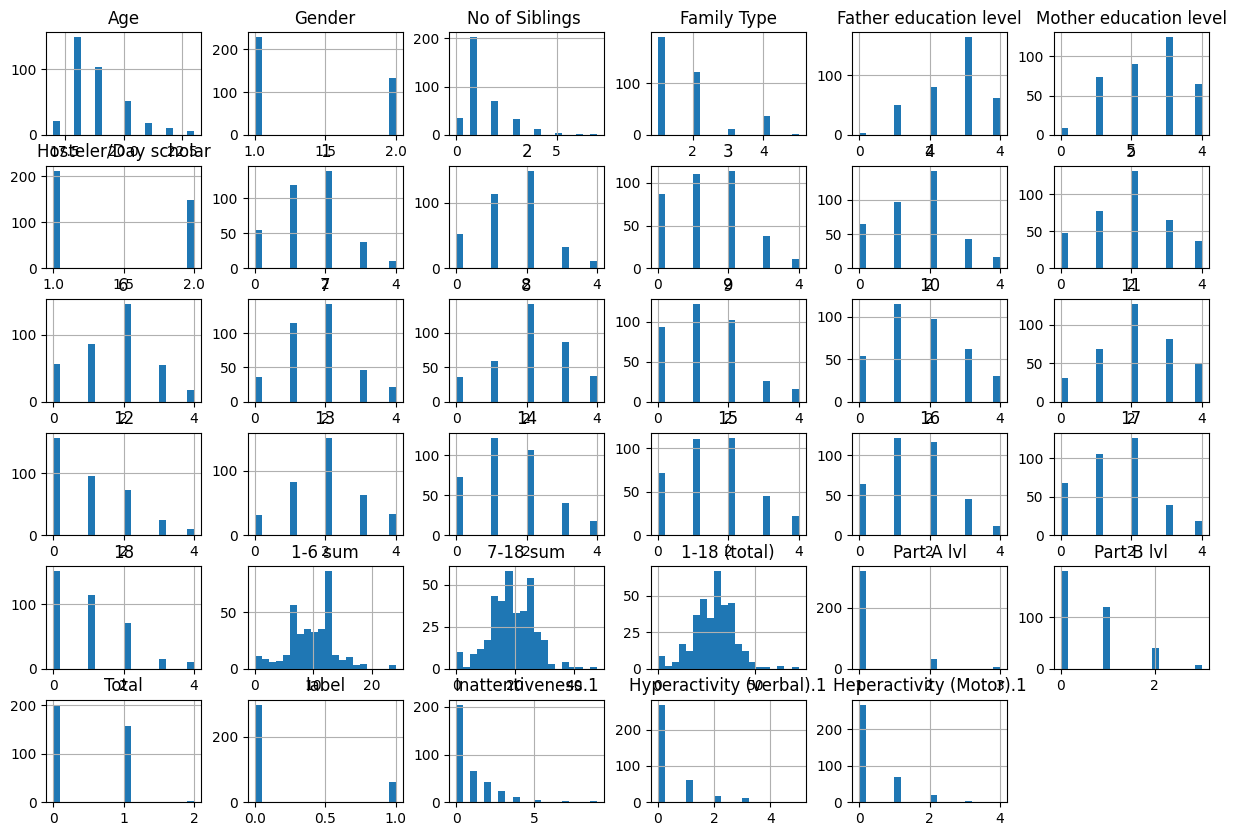

In [ ]:
plt.figure(figsize=(12, 6))
data.hist(bins=20, figsize=(15, 10), layout=(6, 6))
plt.show()

In [ ]:
#creating the lables for 3 types of ADHD
#threshold =  6

#data['Hyperactivity_Combined_Score'] = data['Heperactivity (Motor).1'] + data['Hyperactivity (verbal).1']

#data['Inattentive_label'] = np.where((data['Inattentiveness.1'] >= threshold) & (data['Hyperactivity_Combined_Score'] < threshold), 1, 0)
#data['Hyper_label'] = np.where((data['Hyperactivity_Combined_Score'] >= threshold) & (data['Inattentiveness.1'] < threshold) , 1, 0)
#data['Combined'] = np.where((data['Inattentiveness.1'] >= threshold) & (data['Hyperactivity_Combined_Score'] >= threshold), 1, 0)



In [ ]:
data.columns

Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1-6 sum',
       '7-18 sum', '1-18 (total)', 'Part A lvl', 'Part B lvl', 'Total',
       'label', 'Inattentiveness.1', 'Hyperactivity (verbal).1',
       'Heperactivity (Motor).1'],
      dtype='object')

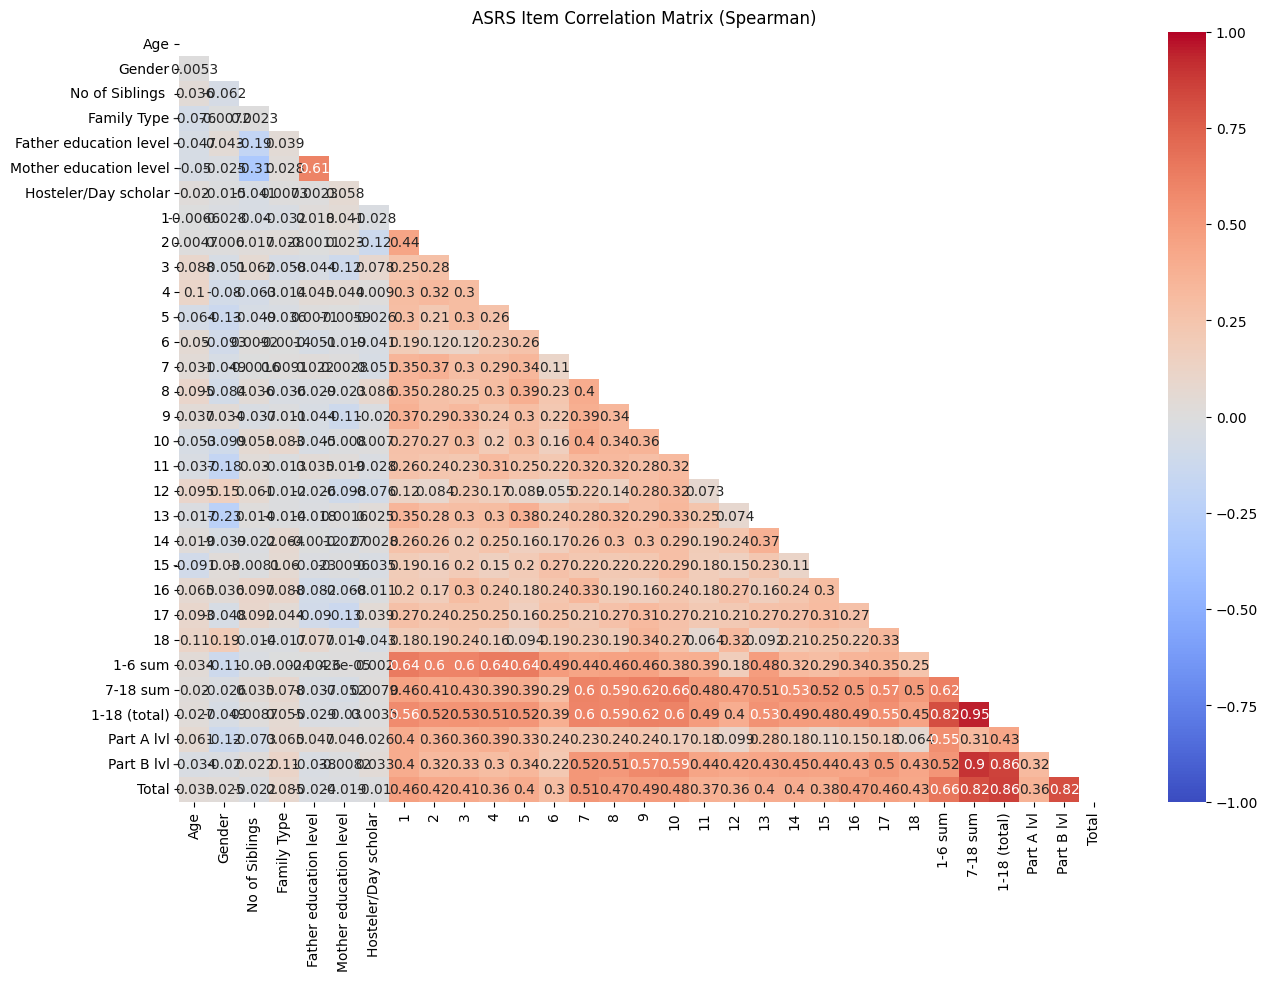

Q11-Q16 Correlation: 0.44 (p=0.0000)


In [ ]:
from scipy.stats import spearmanr


features = ['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1-6 sum',
       '7-18 sum', '1-18 (total)', 'Part A lvl', 'Part B lvl', 'Total'
       ]
corr_matrix = data[features].corr(method='spearman')

# Visualize
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=np.triu(corr_matrix))
plt.title("ASRS Item Correlation Matrix (Spearman)")
plt.show()

# Test significance for specific pairs (e.g., Q11 hyperactivity ↔ Q16 impulsivity)
coef, p = spearmanr(data['1'], data['2'])
print(f"Q11-Q16 Correlation: {coef:.2f} (p={p:.4f})")

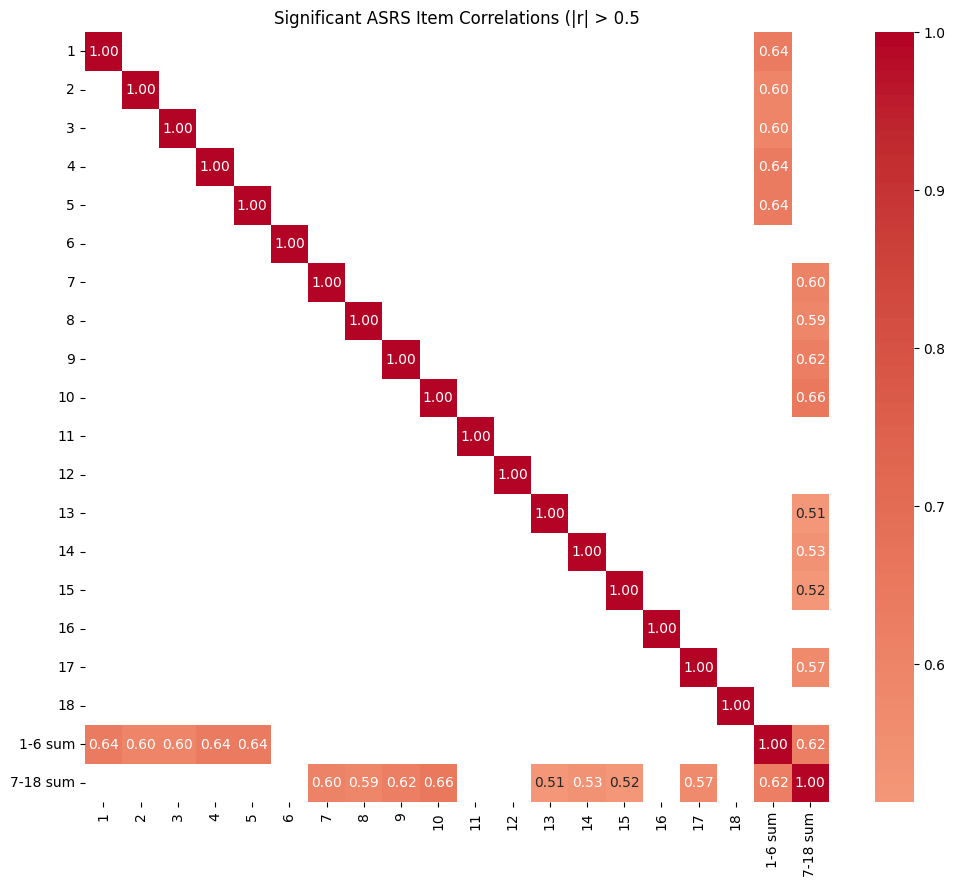

In [ ]:
#we want to see the highest  correlation between variables

sig_corr = corr_matrix[(abs(corr_matrix) > 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(sig_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Significant ASRS Item Correlations (|r| > 0.5")
plt.show()

##3. Feature engeneering

1. Creation of the symptoms scores and labeling of the dominating symptoms

2. Standardization of the feature's scales

In [ ]:
#calculating the percentage of endorsed values for each of the symptoms
# Innatenitveness - 9 points
# Hyperactivity_verbal - 5 points
# Hyperactivity_motor - 4 points

data['Inattentive_per'] = np.round((data["Inattentiveness.1"]/9)*100)
data['Hyper_v_per'] = np.round((data["Hyperactivity (verbal).1"]/5)*100)
data['Hyper_m_per'] = np.round((data["Heperactivity (Motor).1"]/4)*100)

In [ ]:
data.tail(10)

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,1,2,3,...,Part A lvl,Part B lvl,Total,label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1,Inattentive_per,Hyper_v_per,Hyper_m_per
350,18,2,0,1,3,3,1,3,2,1,...,1,2,1,1,1,0,0,11.0,0.0,0.0
351,19,1,1,2,3,2,2,3,2,3,...,1,0,1,0,1,0,0,11.0,0.0,0.0
352,21,1,1,2,3,2,2,3,2,3,...,1,0,1,0,1,0,0,11.0,0.0,0.0
353,18,2,1,2,1,2,2,2,2,2,...,1,1,1,0,0,0,0,0.0,0.0,0.0
354,19,2,1,2,3,3,1,2,2,1,...,1,1,1,0,0,0,0,0.0,0.0,0.0
355,19,2,1,1,4,3,1,1,1,1,...,1,0,0,0,0,0,0,0.0,0.0,0.0
356,19,1,0,1,4,4,1,2,2,2,...,1,1,1,0,0,0,0,0.0,0.0,0.0
357,20,2,4,2,1,1,1,1,1,1,...,1,0,0,0,0,0,0,0.0,0.0,0.0
358,18,1,0,2,3,3,1,3,3,1,...,2,1,1,1,1,0,0,11.0,0.0,0.0
359,19,2,1,1,3,2,2,2,1,1,...,1,0,0,0,0,0,0,0.0,0.0,0.0


In [ ]:
def create_labels(row):
    inattentive = row['Inattentive_per']
    hyper_v = row['Hyper_v_per']
    hyper_m = row['Hyper_m_per']

    # Handle NaNs by replacing them with a very small value (ensuring valid comparisons)
    inattentive = inattentive if not np.isnan(inattentive) else -1
    hyper_v = hyper_v if not np.isnan(hyper_v) else -1
    hyper_m = hyper_m if not np.isnan(hyper_m) else -1

    # Find max value
    max_value = max(inattentive, hyper_v, hyper_m)

    if max_value == 0:
        # If all symptoms are 0%, assign all zeros
        return pd.Series([0, 0, 0])
    else:
        # Otherwise, assign 1 to the max category
        return pd.Series([
            1 if inattentive == max_value else 0,
            1 if hyper_v == max_value else 0,
            1 if hyper_m == max_value else 0
        ])

# Apply function to dataset
data[['Inattentiveness.1', 'Hyperactivity (verbal).1', 'Heperactivity (Motor).1']] = data.apply(create_labels, axis=1)

# Check results
data.head(10)

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,1,2,3,...,Part A lvl,Part B lvl,Total,label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1,Inattentive_per,Hyper_v_per,Hyper_m_per
0,18,2,1,1,4,4,1,2,2,2,...,1,1,1,0,0,0,0,0.0,0.0,0.0
1,19,2,2,1,3,4,2,2,2,2,...,2,1,1,1,0,0,0,0.0,0.0,0.0
2,18,1,1,4,3,3,2,0,0,0,...,1,1,0,0,0,1,0,0.0,20.0,0.0
3,19,1,1,1,3,3,1,2,1,1,...,1,0,0,0,0,0,0,0.0,0.0,0.0
4,18,2,0,2,1,1,1,1,2,2,...,1,1,1,0,0,0,0,0.0,0.0,0.0
5,18,2,0,2,2,1,1,2,3,2,...,1,2,1,1,0,0,1,0.0,0.0,25.0
6,23,2,5,2,3,0,2,1,2,2,...,1,1,1,0,0,0,1,0.0,0.0,25.0
7,18,2,4,1,3,2,2,2,3,2,...,1,0,0,0,0,0,1,0.0,0.0,25.0
8,18,2,3,2,2,1,1,3,3,2,...,1,1,1,0,1,0,0,11.0,0.0,0.0
9,18,2,1,1,1,2,1,1,0,2,...,1,1,1,0,0,1,0,0.0,20.0,0.0


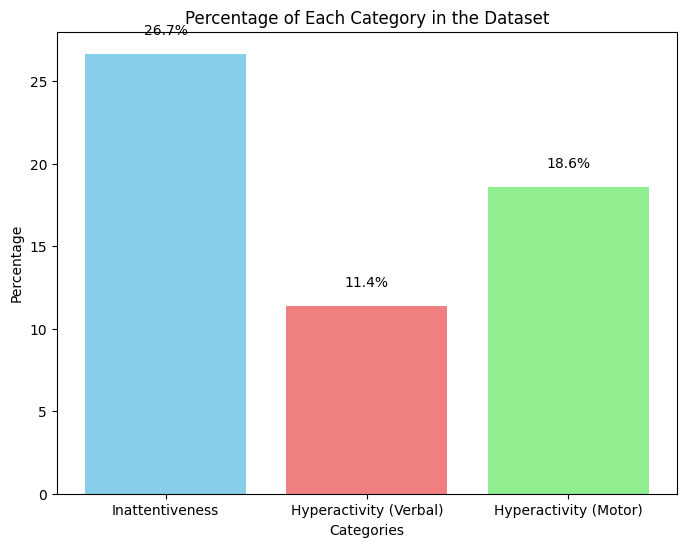

In [ ]:
inattentiveness_percentage = data['Inattentiveness.1'].sum() / len(data) * 100
hyperactivity_verbal_percentage = data['Hyperactivity (verbal).1'].sum() / len(data) * 100
hyperactivity_motor_percentage = data['Heperactivity (Motor).1'].sum() / len(data) * 100

# creation of bar plot
categories = ['Inattentiveness', 'Hyperactivity (Verbal)', 'Hyperactivity (Motor)']
percentages = [inattentiveness_percentage, hyperactivity_verbal_percentage, hyperactivity_motor_percentage]

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Each Category in the Dataset')


#adding the percentages on the top
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'No of Siblings ', '1-6 sum', '7-18 sum', '1-18 (total)']

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
data.columns

Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1-6 sum',
       '7-18 sum', '1-18 (total)', 'Part A lvl', 'Part B lvl', 'Total',
       'label', 'Inattentiveness.1', 'Hyperactivity (verbal).1',
       'Heperactivity (Motor).1', 'Inattentive_per', 'Hyper_v_per',
       'Hyper_m_per'],
      dtype='object')

In [ ]:
data.tail(50)

,Age,Gender,No of Siblings,Family Type,Father education level,Mother education level,Hosteler/Day scholar,1,2,3,...,Part A lvl,Part B lvl,Total,label,Inattentiveness.1,Hyperactivity (verbal).1,Heperactivity (Motor).1,Inattentive_per,Hyper_v_per,Hyper_m_per
310,-0.699538,1,0.482438,1,3,3,1,2,2,0,...,1,0,0,0,0,0,0,0.0,0.0,0.0
311,-0.699538,2,-0.441380,1,3,3,1,1,0,0,...,1,0,0,0,0,0,1,0.0,0.0,25.0
312,0.118104,1,-0.441380,3,0,4,2,0,0,0,...,1,0,0,0,0,0,0,0.0,0.0,0.0
313,-0.699538,2,0.482438,1,2,1,1,1,1,1,...,1,0,0,0,0,0,0,0.0,0.0,0.0
314,-0.699538,1,-0.441380,1,3,3,1,1,0,2,...,1,0,0,0,1,0,0,11.0,0.0,0.0
315,0.935745,1,1.406257,1,4,4,1,3,2,1,...,1,1,1,0,1,0,0,11.0,0.0,0.0
316,0.118104,1,-0.441380,2,3,3,2,2,1,1,...,1,1,0,0,0,0,0,0.0,0.0,0.0
317,-0.699538,1,-0.441380,2,3,3,2,2,1,1,...,1,1,0,0,0,0,0,0.0,0.0,0.0
318,-0.699538,1,0.482438,1,3,2,1,2,2,1,...,1,1,0,0,1,0,0,11.0,0.0,0.0
319,1.753387,1,-0.441380,2,3,3,2,2,3,2,...,2,0,0,1,0,1,0,0.0,20.0,0.0


In [ ]:
data.columns

Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1-6 sum',
       '7-18 sum', '1-18 (total)', 'Part A lvl', 'Part B lvl', 'Total',
       'label', 'Inattentiveness.1', 'Hyperactivity (verbal).1',
       'Heperactivity (Motor).1', 'Inattentive_per', 'Hyper_v_per',
       'Hyper_m_per'],
      dtype='object')

## New data synthesis

Comparison of K-fold cross-validation on original dataset and with dataset data agumentation to meet the 1st study objective


In [ ]:
#import
#ML libraries - models
from sklearn.model_selection import KFold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain
from scipy.sparse import csr_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, hamming_loss

###Testing the model without synthetic data  (1)





In [ ]:
#definition of features and labels
X = data.drop(columns=['Part A lvl', 'Part B lvl', 'Total','label', 'Inattentiveness.1', 'Hyperactivity (verbal).1',
       'Heperactivity (Motor).1', 'Inattentive_per', 'Hyper_v_per', 'Hyper_m_per'])
y = data[[ 'Inattentiveness.1', 'Hyperactivity (verbal).1','Heperactivity (Motor).1']]

In [ ]:
X.columns


Index(['Age', 'Gender', 'No of Siblings ', 'Family Type',
       'Father education level', 'Mother education level',
       'Hosteler/Day scholar', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '1-6 sum',
       '7-18 sum', '1-18 (total)'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from scipy.sparse import csr_matrix, lil_matrix
from scipy import sparse

In [44]:

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors

class MLkNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=10, s=1.0):
        self.k = k
        self.s = s

    def fit(self, X, y):
        #  onvert y to sparse if needed
        self.y_train = csr_matrix(y) if not issparse(y) else y
        self.X_train = X
        self._num_labels = self.y_train.shape[1]

        # compute prior probabilities
        self._compute_prior()

        # compute posterior probabilities
        self._compute_cond(X)
        return self

    def _compute_prior(self):
        # P(y=1) and P(y=0) for each label with smoothing
        self._prior_prob_true = (self.y_train.sum(axis=0) + self.s) / (self.y_train.shape[0] + 2 * self.s)
        self._prior_prob_false = 1 - self._prior_prob_true

    def _compute_cond(self, X):
        self.knn_ = NearestNeighbors(n_neighbors=self.k).fit(X)
        distances, indices = self.knn_.kneighbors(X)

        # initialize matrices
        c = np.zeros((self._num_labels, self.k + 1))
        cn = np.zeros((self._num_labels, self.k + 1))

        for i in range(X.shape[0]):
            neighbors = indices[i]
            for label in range(self._num_labels):
                delta = self.y_train[neighbors, label].sum()
                if self.y_train[i, label]:
                    c[label, delta] += 1
                else:
                    cn[label, delta] += 1

        # application of smooting
        self._cond_prob_true = (c + self.s) / (c.sum(axis=1, keepdims=True) + (self.k + 1) * self.s)
        self._cond_prob_false = (cn + self.s) / (cn.sum(axis=1, keepdims=True) + (self.k + 1) * self.s)

    def predict(self, X):
        distances, indices = self.knn_.kneighbors(X)
        predictions = []

        for i in range(X.shape[0]):
            neighbors = indices[i]
            pred = []
            for label in range(self._num_labels):
                delta = self.y_train[neighbors, label].sum()

                # calculation of prob
                prob_true = self._prior_prob_true[0, label] * self._cond_prob_true[label, delta]
                prob_false = self._prior_prob_false[0, label] * self._cond_prob_false[label, delta]

                pred.append(1 if prob_true > prob_false else 0)
            predictions.append(pred)

        return csr_matrix(predictions)

In [45]:
results = {
    'Classifier Chains (Random Forest)': [],
    'Binary Relevance (kNN)': [],
    'Multi-label kNN': []
}
#k-fold validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kfold.split(X)):
    print(f"\nFold: {fold + 1}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

    # 1st model
    print("Running Classifier Chains (Random Forest)...")
    chain_rf = ClassifierChain(
        RandomForestClassifier(n_estimators=100, random_state=42),
        order='random',
        random_state=42
    )
    chain_rf.fit(X_train, y_train)
    chain_pred = chain_rf.predict(X_test)

    results['Classifier Chains (Random Forest)'].append({
        "Classification report": classification_report(y_test, chain_pred, zero_division=0, output_dict=True),
        "Hamming loss": hamming_loss(y_test, chain_pred)
    })

    # 2nd model
    print("Running Binary Relevance kNN...")
    br_knn = MultiOutputClassifier(
        KNeighborsClassifier(n_neighbors=5),
        n_jobs=-1
    )
    br_knn.fit(X_train, y_train)
    br_pred = br_knn.predict(X_test)

    results['Binary Relevance (kNN)'].append({
        "Classification report": classification_report(y_test, br_pred, zero_division=0, output_dict=True),
        "Hamming loss": hamming_loss(y_test, br_pred)
    })

    # 3rd model
    print("Running Multi-label kNN...")
    try:
        mlknn = MLkNN(k=10)
        # Convert y to sparse format for MLkNN
        y_train_sparse = csr_matrix(y_train)
        mlknn.fit(X_train, y_train_sparse)
        ml_pred = mlknn.predict(X_test)

        results['Multi-label kNN'].append({
            "Classification report": classification_report(y_test, ml_pred.toarray(), zero_division=0, output_dict=True),
            "Hamming loss": hamming_loss(y_test, ml_pred.toarray())
        })
    except Exception as e:
        print(f"Error in MLkNN: {str(e)}")
        results['Multi-label kNN'].append({
            "Classification report": None,
            "Hamming loss": None
        })

# Calculate average metrics (for all folds)
for model in results:
    valid_folds = [fold for fold in results[model] if fold['Hamming loss'] is not None]
    if valid_folds:
        avg_hamming = np.mean([fold['Hamming loss'] for fold in valid_folds])
        print(f"\n{model} - Average Hamming Loss: {avg_hamming:.4f}")



Fold: 1
Train shape: (288, 28), Test shape: (72, 28)
Running Classifier Chains (Random Forest)...
Running Binary Relevance kNN...
Running Multi-label kNN...
Error in MLkNN: name 'issparse' is not defined

Fold: 2
Train shape: (288, 28), Test shape: (72, 28)
Running Classifier Chains (Random Forest)...
Running Binary Relevance kNN...
Running Multi-label kNN...
Error in MLkNN: name 'issparse' is not defined

Fold: 3
Train shape: (288, 28), Test shape: (72, 28)
Running Classifier Chains (Random Forest)...
Running Binary Relevance kNN...
Running Multi-label kNN...
Error in MLkNN: name 'issparse' is not defined

Fold: 4
Train shape: (288, 28), Test shape: (72, 28)
Running Classifier Chains (Random Forest)...
Running Binary Relevance kNN...
Running Multi-label kNN...
Error in MLkNN: name 'issparse' is not defined

Fold: 5
Train shape: (288, 28), Test shape: (72, 28)
Running Classifier Chains (Random Forest)...
Running Binary Relevance kNN...
Running Multi-label kNN...
Error in MLkNN: name '

In [46]:
for classifier_name, fold_results in results.items():
  print(f"\nResults for {classifier_name}:")
  for i, fold_result in enumerate(fold_results):
    print(f"\nFold {i + 1}:")
    print("Classification Report:")
    print(fold_result["Classification report"])
    print(f"Hamming Loss: {fold_result['Hamming loss']}")



Results for Classifier Chains (Random Forest):

Fold 1:
Classification Report:
{'0': {'precision': 0.5882352941176471, 'recall': 0.5263157894736842, 'f1-score': 0.5555555555555556, 'support': 19.0}, '1': {'precision': 0.875, 'recall': 0.7777777777777778, 'f1-score': 0.8235294117647058, 'support': 9.0}, '2': {'precision': 1.0, 'recall': 0.6428571428571429, 'f1-score': 0.782608695652174, 'support': 14.0}, 'micro avg': {'precision': 0.7647058823529411, 'recall': 0.6190476190476191, 'f1-score': 0.6842105263157895, 'support': 42.0}, 'macro avg': {'precision': 0.8210784313725491, 'recall': 0.6489835700362017, 'f1-score': 0.7205645543241451, 'support': 42.0}, 'weighted avg': {'precision': 0.7869397759103642, 'recall': 0.6190476190476191, 'f1-score': 0.6886629047754367, 'support': 42.0}, 'samples avg': {'precision': 0.3402777777777778, 'recall': 0.3611111111111111, 'f1-score': 0.3472222222222222, 'support': 42.0}}
Hamming Loss: 0.1111111111111111

Fold 2:
Classification Report:
{'0': {'precis

In [47]:
def calculate_average_metrics(results, model_name):
  """Calculates average precision, recall, and F1 score for a given model across folds."""
  avg_precision = 0
  avg_recall = 0
  avg_f1 = 0
  num_folds = 0
  for fold_result in results[model_name]:
    if fold_result["Classification report"]:
      report = fold_result["Classification report"]
      for label in ['0', '1']:
        if label in report:  # Check if the label exists in the report
          avg_precision += report[label]['precision']
          avg_recall += report[label]['recall']
          avg_f1 += report[label]['f1-score']
          num_folds += 1
  if num_folds > 0:
    avg_precision /= num_folds
    avg_recall /= num_folds
    avg_f1 /= num_folds
    return avg_precision, avg_recall, avg_f1
  else:
    return None, None, None


# calculation of average metrics
for model_name in results:
  avg_precision, avg_recall, avg_f1 = calculate_average_metrics(results, model_name)
  if avg_precision is not None:
    print(f"\nAverage metrics for {model_name}:")
    print(f"  Average Precision: {avg_precision:.4f}")
    print(f"  Average Recall: {avg_recall:.4f}")
    print(f"  Average F1 Score: {avg_f1:.4f}")
  else:
    print(f"\nNo valid results for {model_name}.")



Average metrics for Classifier Chains (Random Forest):
  Average Precision: 0.8024
  Average Recall: 0.4916
  Average F1 Score: 0.5515

Average metrics for Binary Relevance (kNN):
  Average Precision: 0.4092
  Average Recall: 0.1395
  Average F1 Score: 0.1972

No valid results for Multi-label kNN.


###Testing the model with synthetic data  (2)

MLSMOTE technique and code used from [here](https://github.com/niteshsukhwani/MLSMOTE/blob/master/README.md)


In [48]:
import random
from sklearn.datasets import make_classification


def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe

    args
    df: pandas.DataFrame, target label df whose tail label has to identified

    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified

  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels

    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe

    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance

    args
    X: np.array, array whose nearest neighbor has to find

    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm

    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample

    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

if __name__=='__main__':
    """
    main function to use the MLSMOTE
    """
    X_sub, y_sub = get_minority_instace(X, y)
    X_res,y_res =MLSMOTE(X_sub, y_sub, 100)

In [49]:
X_res.shape

(141, 28)

In [50]:
#concatenating the dataset with the synthetic samples
X_ag = pd.concat([X, X_res]).reset_index(drop=True)
y_ag = pd.concat([y, y_res]).reset_index(drop=True)

In [51]:
print(X_ag.shape)
print(y_ag.shape)

(501, 28)
(501, 3)



Fold: 1
Train shapes - X: (400, 28), y: (400, 3)
Test shapes - X: (101, 28), y: (101, 3)

Training Classifier Chains (RF)...

Training Binary Relevance kNN...

Training Multi-label kNN...

Fold: 2
Train shapes - X: (401, 28), y: (401, 3)
Test shapes - X: (100, 28), y: (100, 3)

Training Classifier Chains (RF)...

Training Binary Relevance kNN...

Training Multi-label kNN...

Fold: 3
Train shapes - X: (401, 28), y: (401, 3)
Test shapes - X: (100, 28), y: (100, 3)

Training Classifier Chains (RF)...

Training Binary Relevance kNN...

Training Multi-label kNN...

Fold: 4
Train shapes - X: (401, 28), y: (401, 3)
Test shapes - X: (100, 28), y: (100, 3)

Training Classifier Chains (RF)...

Training Binary Relevance kNN...

Training Multi-label kNN...

Fold: 5
Train shapes - X: (401, 28), y: (401, 3)
Test shapes - X: (100, 28), y: (100, 3)

Training Classifier Chains (RF)...

Training Binary Relevance kNN...

Training Multi-label kNN...

=== Final Results ===
Classifier Chains (Random Forest

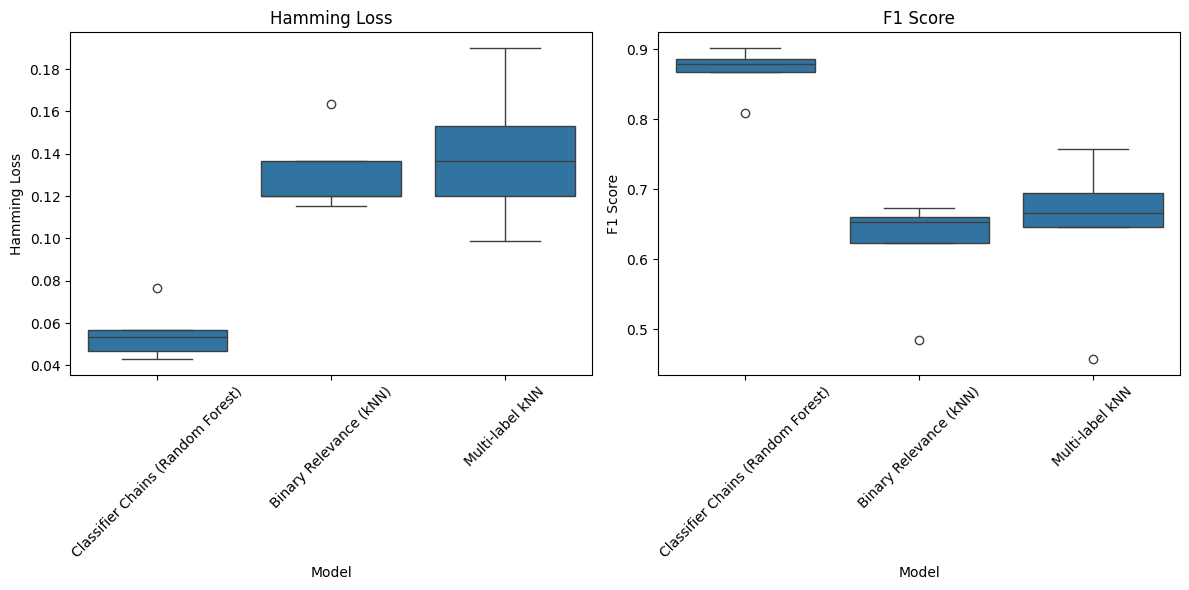

In [52]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.metrics import classification_report, hamming_loss
from scipy.sparse import csr_matrix, issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

#implementation of MLkNN
class MLkNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=10):
        self.k = k

    def fit(self, X, y):
        # conversion of input
        self.X_train_ = X.values if isinstance(X, pd.DataFrame) else X
        self.X_train_ = np.asarray(self.X_train_, dtype=np.float32)

        self.y_train_ = csr_matrix(y) if not issparse(y) else y
        self.y_train_dense_ = np.asarray(self.y_train_.toarray(), dtype=np.int32)
        self.num_labels_ = self.y_train_.shape[1]

        # computation of prior possibilities
        self._compute_prior()

        # computation of conditional possibilities
        self._compute_conditional()
        return self

    def _compute_prior(self):
        label_counts = np.array(self.y_train_.sum(axis=0)).flatten()
        self.prior_prob_1_ = (label_counts / self.y_train_.shape[0]).astype(np.float32)
        self.prior_prob_0_ = (1 - self.prior_prob_1_).astype(np.float32)

    def _compute_conditional(self):
        self.nn_ = NearestNeighbors(n_neighbors=self.k)
        self.nn_.fit(self.X_train_)

        # Initialize count matrices with integer type
        self.c1_ = np.zeros((self.num_labels_, self.k + 1), dtype=np.int32)
        self.c0_ = np.zeros((self.num_labels_, self.k + 1), dtype=np.int32)

        # Get all nearest neighbors
        _, indices = self.nn_.kneighbors(self.X_train_)

        # Count neighbors with each label
        for i in range(self.X_train_.shape[0]):
            neighbors = indices[i]
            for label in range(self.num_labels_):
                delta = int(self.y_train_dense_[neighbors, label].sum())  # Ensure integer delta
                if self.y_train_dense_[i, label] == 1:
                    self.c1_[label, delta] += 1
                else:
                    self.c0_[label, delta] += 1

        # smooth probabilities
        smoothing = 1.0
        self.cond_prob_1_ = ((self.c1_ + smoothing) /
                            (self.c1_.sum(axis=1, keepdims=True) + (self.k + 1) * smoothing)).astype(np.float32)
        self.cond_prob_0_ = ((self.c0_ + smoothing) /
                            (self.c0_.sum(axis=1, keepdims=True) + (self.k + 1) * smoothing)).astype(np.float32)

    def predict(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        X = np.asarray(X, dtype=np.float32)
        _, indices = self.nn_.kneighbors(X)
        predictions = np.zeros((X.shape[0], self.num_labels_), dtype=np.int32)

        for i in range(X.shape[0]):
            neighbors = indices[i]
            for label in range(self.num_labels_):
                delta = int(self.y_train_dense_[neighbors, label].sum())  # Ensure integer delta
                prob1 = self.prior_prob_1_[label] * self.cond_prob_1_[label, delta]
                prob0 = self.prior_prob_0_[label] * self.cond_prob_0_[label, delta]
                predictions[i, label] = 1 if prob1 > prob0 else 0

        return csr_matrix(predictions)


X_ag_array = np.asarray(X_ag, dtype=np.float32)
y_ag_array = np.asarray(y_ag, dtype=np.int32)


X_ag = pd.DataFrame(X_ag_array)
y_ag = pd.DataFrame(y_ag_array)

#running of the ecaluation
results = {
    'Classifier Chains (Random Forest)': [],
    'Binary Relevance (kNN)': [],
    'Multi-label kNN': []
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kfold.split(X_ag)):
    print(f"\nFold: {fold + 1}")
    X_train, X_test = X_ag.iloc[train_index], X_ag.iloc[test_index]
    y_train, y_test = y_ag.iloc[train_index], y_ag.iloc[test_index]

    print(f"Train shapes - X: {X_train.shape}, y: {y_train.shape}")
    print(f"Test shapes - X: {X_test.shape}, y: {y_test.shape}")

    # 1. Classifier Chain with Random Forest
    print("\nTraining Classifier Chains (RF)...")
    chain_rf = ClassifierChain(
        RandomForestClassifier(n_estimators=100, random_state=42),
        order='random',
        random_state=42
    )
    chain_rf.fit(X_train, y_train)
    chain_pred = chain_rf.predict(X_test)

    results['Classifier Chains (Random Forest)'].append({
        "Classification report": classification_report(y_test, chain_pred, zero_division=0, output_dict=True),
        "Hamming loss": hamming_loss(y_test, chain_pred)
    })

    # 2. Binary Relevance kNN
    print("\nTraining Binary Relevance kNN...")
    br_knn = MultiOutputClassifier(
        KNeighborsClassifier(n_neighbors=5),
        n_jobs=-1
    )
    br_knn.fit(X_train, y_train)
    br_pred = br_knn.predict(X_test)

    results['Binary Relevance (kNN)'].append({
        "Classification report": classification_report(y_test, br_pred, zero_division=0, output_dict=True),
        "Hamming loss": hamming_loss(y_test, br_pred)
    })

    # 3. MLkNN
    print("\nTraining Multi-label kNN...")
    try:
        mlknn = MLkNN(k=10)
        mlknn.fit(X_train, y_train)
        ml_pred = mlknn.predict(X_test).toarray()

        results['Multi-label kNN'].append({
            "Classification report": classification_report(y_test, ml_pred, zero_division=0, output_dict=True),
            "Hamming loss": hamming_loss(y_test, ml_pred)
        })
    except Exception as e:
        print(f"MLkNN Error: {str(e)}")
        results['Multi-label kNN'].append(None)

# 4. Calculate and display final results
print("\n=== Final Results ===")
for model_name in results:
    valid_folds = [fold for fold in results[model_name] if fold is not None]
    if valid_folds:
        avg_hamming = np.mean([fold['Hamming loss'] for fold in valid_folds])
        avg_f1 = np.mean([fold['Classification report']['micro avg']['f1-score'] for fold in valid_folds])
        print(f"{model_name}:")
        print(f"  Average Hamming Loss: {avg_hamming:.4f}")
        print(f"  Average Micro F1: {avg_f1:.4f}")
    else:
        print(f"{model_name}: All folds failed")

# 5. Visualization
metrics = []
for model_name in results:
    for fold in results[model_name]:
        if fold is not None:
            metrics.append({
                'Model': model_name,
                'Hamming Loss': fold['Hamming loss'],
                'F1 Score': fold['Classification report']['micro avg']['f1-score']
            })

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(12, 6))
for i, metric in enumerate(['Hamming Loss', 'F1 Score']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Model', y=metric, data=metrics_df)
    plt.title(metric)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Classifiers worked better with the aguamented data

# Multilabel classification model

Since we have multiple symptoms possible for one person, to meet the first study objective  we need to build multi-label classifier

3.1 Feature selection

3.2 Model selection

3.3 Performance assesement

Splitting the train and test sets
applying scaller

In [53]:
pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.7 MB/s eta 0:00:00


In [54]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from skmultilearn.problem_transform import BinaryRelevance
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

In [55]:
X_ag.shape
y_ag.shape

(501, 3)

In [56]:
from sklearn.metrics import make_scorer, hamming_loss
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

hamming_scorer = make_scorer(hamming_loss, greater_is_better=False)

In [57]:
models = {
    "CC_RF": {
        "model": ClassifierChain(RandomForestClassifier()),
        "params": {
            'base_estimator__n_estimators': [2, 5, 10, 50, 100],
            'base_estimator__max_depth': [5, 10],
            'base_estimator__min_samples_split': [2, 5],
            'order':['random', None]
        }
    },
    "ClassifierChain_XGB": {
        "model": ClassifierChain(XGBClassifier(eval_metric='logloss')),
        "params": {
            'base_estimator__max_depth': [3, 5, 7],
            'base_estimator__learning_rate': [0.1, 0.01],
            'base_estimator__n_estimators': [50, 100],
            'order': ['random', None]
        }
    },
    "BinaryRelevance_RF": {
        "model": BinaryRelevance(RandomForestClassifier()),
        "params": {
            'classifier__n_estimators': [50, 100],
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_split': [2, 5]
        }
    },
     "MultiOutput_RF": {
        "model": MultiOutputClassifier(RandomForestClassifier()),
        "params": {
            'estimator__n_estimators': [50, 100],
            'estimator__max_depth': [5, 10, None],
            'estimator__min_samples_split': [2, 5]
        }
    },
    "MLkNN": {
        "model": MLkNN(),
        "params": {
            'k': [3, 5, 10, 20]
        }
    },
    "OneVsRest_XGB": {
        "model": OneVsRestClassifier(XGBClassifier(eval_metric='logloss')),
        "params": {
            'estimator__max_depth': [3, 5],
            'estimator__learning_rate': [0.1, 0.05]
        }
    }
}

results = {}
for name, config in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")

    grid = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=hamming_scorer,
        cv=5,
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X, y)

    results[name] = {
        'best_params': grid.best_params_,
        'best_score': -grid.best_score_,  # Convert back to normal Hamming Loss
        'best_estimator': grid.best_estimator_
    }

    print(f"{name} completed. Best Hamming Loss: {-grid.best_score_:.4f}")


# 6. Print all results
print("\n\nFINAL RESULTS:")
for name, res in results.items():
    print(f"\n{name}:")
    print(f"Best params: {res['best_params']}")
    print(f"Hamming Loss: {res['best_score']:.4f}")

# 6. Get best model
best_model_name = min(results, key=lambda x: results[x]['best_score'])
best_model = results[best_model_name]['best_estimator']
print(f"\nBest model is {best_model_name} with Hamming Loss: {results[best_model_name]['best_score']:.4f}")


Training CC_RF...
Fitting 5 folds for each of 40 candidates, totalling 200 fits
CC_RF completed. Best Hamming Loss: 0.1074

Training ClassifierChain_XGB...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
ClassifierChain_XGB completed. Best Hamming Loss: 0.0796

Training BinaryRelevance_RF...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
BinaryRelevance_RF completed. Best Hamming Loss: 0.1139

Training MultiOutput_RF...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
MultiOutput_RF completed. Best Hamming Loss: 0.1111

Training MLkNN...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
MLkNN completed. Best Hamming Loss: 0.1843

Training OneVsRest_XGB...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
OneVsRest_XGB completed. Best Hamming Loss: 0.0861


FINAL RESULTS:

CC_RF:
Best params: {'base_estimator__max_depth': 10, 'base_estimator__min_samples_split': 5, 'base_estimator__n_estimators': 50, 'order': 'random'}
Hamming

| Model               |   Precision (Macro) |   Recall (Macro) |   F1-Score (Macro) |   Hamming Loss | Parameters                                                                                                                       |
|:--------------------|--------------------:|-----------------:|-------------------:|---------------:|:---------------------------------------------------------------------------------------------------------------------------------|
| OneVsRest_XGB       |            0.960438 |         0.891111 |           0.922841 |      0.0266667 | {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5}                                                                     |
| CC_RF               |            0.965315 |         0.864444 |           0.908586 |      0.0366667 | {'base_estimator__max_depth': 10, 'base_estimator__min_samples_split': 2, 'base_estimator__n_estimators': 50, 'order': 'random'} |
| ClassifierChain_XGB |            0.935305 |         0.868254 |

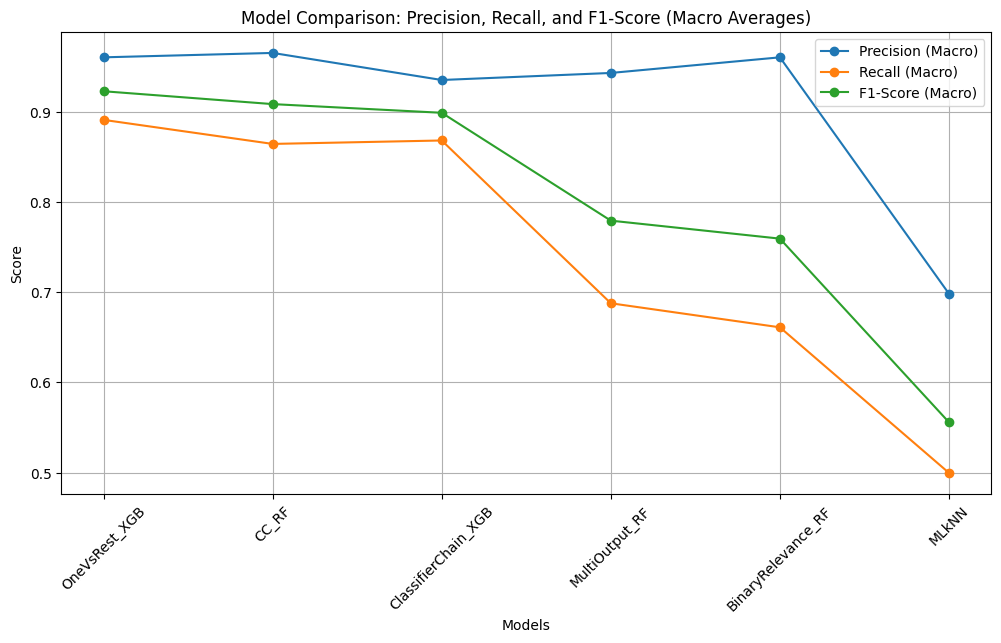

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss, accuracy_score
import pandas as pd

best_models = {
    'CC_RF': {
        'model': ClassifierChain(
            RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=50),
            order='random'
        ),
        'params': {'base_estimator__max_depth': 10, 'base_estimator__min_samples_split': 2,
                  'base_estimator__n_estimators': 50, 'order': 'random'}
    },
    'ClassifierChain_XGB': {
        'model': ClassifierChain(
            XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=50),
            order='random'
        ),
        'params': {'base_estimator__learning_rate': 0.1, 'base_estimator__max_depth': 5,
                  'base_estimator__n_estimators': 50, 'order': 'random'}
    },
    'BinaryRelevance_RF': {
        'model': BinaryRelevance(
            RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100)
        ),
        'params': {'classifier__max_depth': 10, 'classifier__min_samples_split': 5,
                  'classifier__n_estimators': 100}
    },
    'MultiOutput_RF': {
        'model': MultiOutputClassifier(
            RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100)
        ),
        'params': {'estimator__max_depth': 10, 'estimator__min_samples_split': 2,
                  'estimator__n_estimators': 100}
    },
    'MLkNN': {
        'model': MLkNN(k=10),
        'params': {'k': 10}
    },
    'OneVsRest_XGB': {
        'model': OneVsRestClassifier(
            XGBClassifier(learning_rate=0.1, max_depth=5)
        ),
        'params': {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5}
    }
}

# calculate metrics for each model
results = []
for model_name, model_info in best_models.items():
    model = model_info['model']
    model.fit(X_train, y_train)  # Make sure to fit if not already fitted
    y_pred = model.predict(X_test)

    # calculate metrics (macro averages)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    h_loss = hamming_loss(y_test, y_pred)

    results.append({
        'Model': model_name,
        'Precision (Macro)': precision,
        'Recall (Macro)': recall,
        'F1-Score (Macro)': f1,
        'Hamming Loss': h_loss,
        'Parameters': str(model_info['params'])
    })

# convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df[['Model', 'Precision (Macro)', 'Recall (Macro)',
                        'F1-Score (Macro)', 'Hamming Loss', 'Parameters']]

# sort by F1-score
results_df = results_df.sort_values('F1-Score (Macro)', ascending=False)
print(results_df.to_markdown(index=False))


plt.figure(figsize=(12, 6))
models = results_df['Model']
metrics = ['Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)']

for metric in metrics:
    plt.plot(models, results_df[metric], marker='o', label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Precision, Recall, and F1-Score (Macro Averages)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

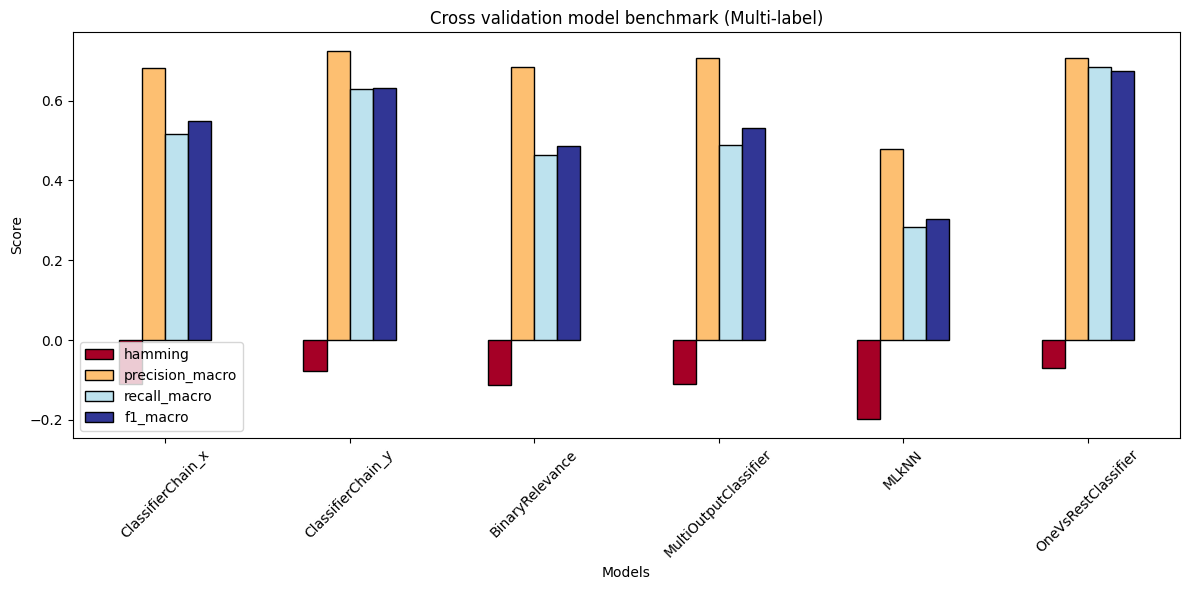

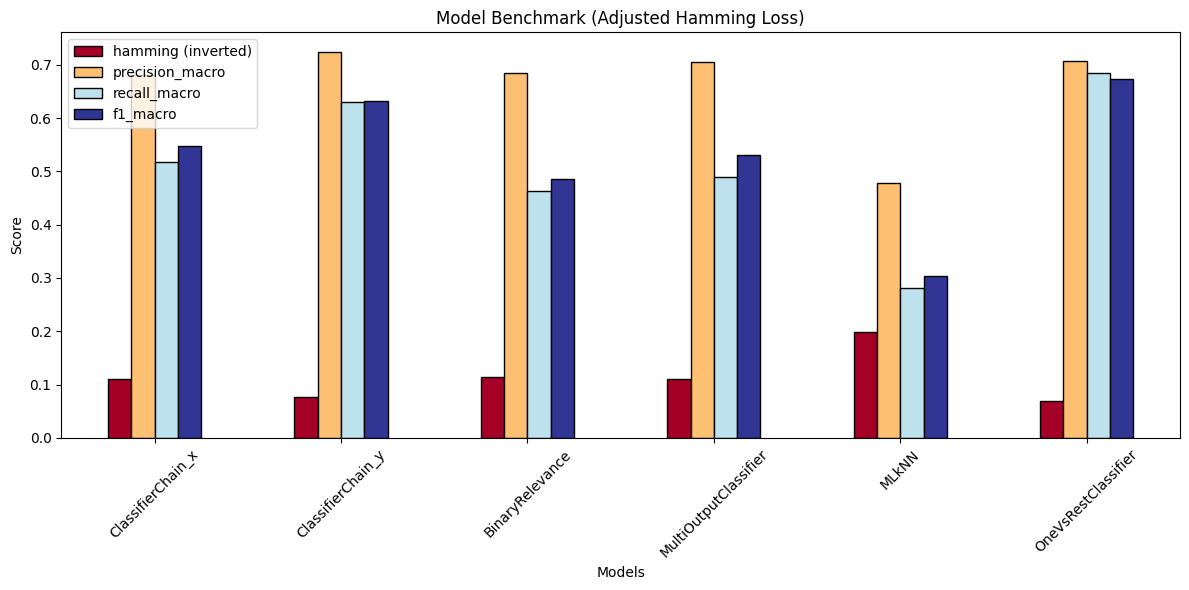

In [59]:
from functools import reduce
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss, accuracy_score


# custom scorer for multi-label metrics
def _get_model_name(model):
    """Returns a string with the name of a sklearn model"""
    if isinstance(model, Pipeline):
        estimator = model.steps[-1][1]
        name = "Pipeline_" + str(estimator).split('(')[0]
    else:
        name = str(model).split('(')[0]
    return name

def plot_cv_score(X, y, models_list, cv=5, scoring_list=None, refit=True, return_scores=False):
    """
    X: numpy_array/pandas dataframe n_rows, m_features
    y: numpy_array/pandas dataframe n_rows (multi-label format)
    Plots min, max and avg kfold cross_val_score for a list of models
    """
    # Define multi-label compatible scorers
    multi_label_scorers = {
        'hamming': make_scorer(hamming_loss, greater_is_better=False),
        'precision_macro': make_scorer(precision_score, average='macro'),
        'recall_macro': make_scorer(recall_score, average='macro'),
        'f1_macro': make_scorer(f1_score, average='macro'),
        'accuracy': make_scorer(accuracy_score)
    }

    if scoring_list is None:
        scoring_list = ['hamming', 'precision_macro', 'recall_macro', 'f1_macro']

    names, mean_score = list(), list()
    ldf = list()

    for i, model in enumerate(models_list):
        name = _get_model_name(model)

        if refit:
            model.fit(X, y)

        for metric in scoring_list:
            if metric in multi_label_scorers:
                scorer = multi_label_scorers[metric]
            else:
                scorer = metric

            try:
                score = cross_val_score(model, X, y, cv=cv, scoring=scorer, n_jobs=-1)
                mean_score.append(np.mean(score))
            except Exception as e:
                print(f"Error calculating {metric} for {name}: {str(e)}")
                mean_score.append(np.nan)

        tmp = pd.DataFrame({name: mean_score}, index=scoring_list)
        ldf.append(tmp)
        mean_score = list()

    frame_scores = reduce(lambda x,y: pd.merge(x,y, left_index=True, right_index=True), ldf).T

    fig, ax = plt.subplots(1,1, figsize=(12,6))
    frame_scores.plot.bar(ax=ax, cmap='RdYlBu', edgecolor="black")
    ax.legend(loc='best')
    ax.set_xlabel("Models")
    ax.set_ylabel("Score")
    ax.set_title("Cross validation model benchmark (Multi-label)")
    plt.xticks(rotation=45)
    plt.tight_layout()

    if return_scores:
        return frame_scores

# initializing the models with parametres
models_list = [
    ClassifierChain(
        RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=50),
        order='random'
    ),
    ClassifierChain(
        XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=50),
        order='random'
    ),
    BinaryRelevance(
        RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100)
    ),
    MultiOutputClassifier(
        RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100)
    ),
    MLkNN(k=10),
    OneVsRestClassifier(
        XGBClassifier(learning_rate=0.1, max_depth=5)
    )
]

# defining metrics
score_list = ['hamming', 'precision_macro', 'recall_macro', 'f1_macro']


results = plot_cv_score(
    X=X_train,
    y=y_train,
    models_list=models_list,
    cv=5,
    scoring_list=score_list,
    refit=True,
    return_scores=True
)


results['hamming'] = -results['hamming']  #convertation
results.rename(columns={'hamming': 'hamming (inverted)'}, inplace=True)


fig, ax = plt.subplots(1,1, figsize=(12,6))
results.plot.bar(ax=ax, cmap='RdYlBu', edgecolor="black")
ax.legend(loc='best')
ax.set_xlabel("Models")
ax.set_ylabel("Score")
ax.set_title("Model Benchmark (Adjusted Hamming Loss)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#4. Model explainability

In [60]:
cc_rf_model = best_models['CC_RF']['model']
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': cc_rf_model.estimators_[0].feature_importances_
}).sort_values('Importance', ascending=False)

print("CC_RF Feature Importance:")
print(importance_df.to_markdown(index=False))

CC_RF Feature Importance:
|   Feature |   Importance |
|----------:|-------------:|
|        11 |    0.191056  |
|        18 |    0.11261   |
|        12 |    0.0999846 |
|        19 |    0.0917456 |
|        20 |    0.0734529 |
|        10 |    0.0265509 |
|        26 |    0.0248915 |
|        24 |    0.0245334 |
|        25 |    0.0243428 |
|        27 |    0.0230677 |
|         9 |    0.0217478 |
|        15 |    0.0214761 |
|        21 |    0.0207335 |
|         3 |    0.020731  |
|         8 |    0.0206363 |
|         7 |    0.0205688 |
|         6 |    0.0185999 |
|         2 |    0.0178501 |
|        16 |    0.0162735 |
|        13 |    0.0161009 |
|         1 |    0.0154995 |
|         4 |    0.0154781 |
|        23 |    0.015298  |
|        17 |    0.014754  |
|        22 |    0.0140179 |
|        14 |    0.0137123 |
|         0 |    0.0135447 |
|         5 |    0.0107428 |


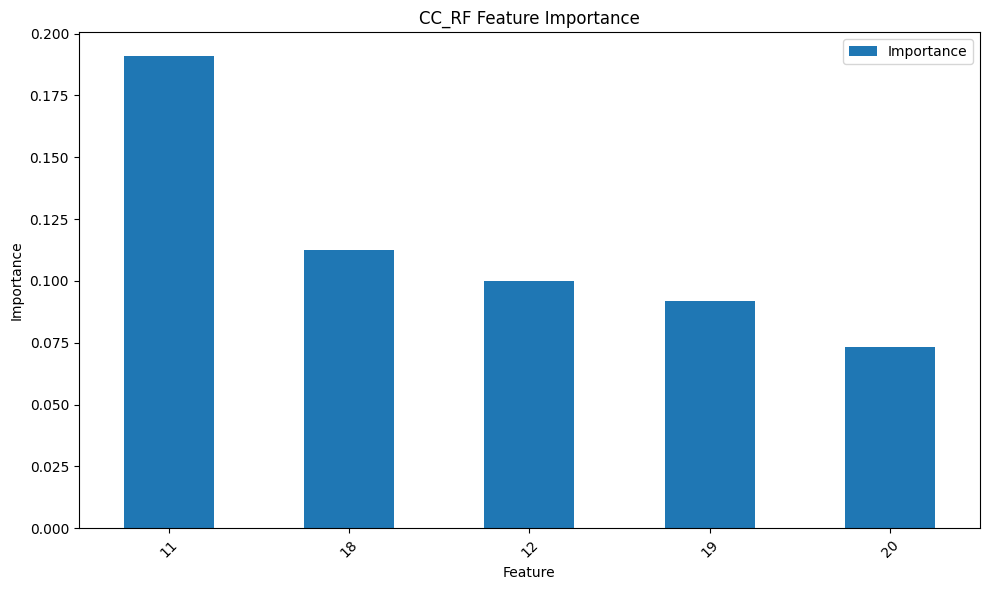

In [61]:
top_5 = importance_df.head(5)
top_5.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('CC_RF Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [62]:
xgb_model = best_models['ClassifierChain_XGB']['model']
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.estimators_[0].feature_importances_
}).sort_values('Importance', ascending=False)

print("ClassifierChain_XGB Feature Importance:")
print(importance_df.to_markdown(index=False))
#

ClassifierChain_XGB Feature Importance:
|   Feature |   Importance |
|----------:|-------------:|
|         4 |   0.213271   |
|        22 |   0.0911359  |
|        24 |   0.063802   |
|        23 |   0.0632628  |
|        21 |   0.0605049  |
|        20 |   0.0540038  |
|        11 |   0.0440899  |
|        12 |   0.0430162  |
|         1 |   0.0428366  |
|        25 |   0.0369672  |
|        14 |   0.0355618  |
|        27 |   0.0320526  |
|        26 |   0.0272632  |
|         5 |   0.0263978  |
|        19 |   0.0242614  |
|         0 |   0.0218647  |
|        13 |   0.0188443  |
|        17 |   0.0173387  |
|        10 |   0.0154098  |
|         7 |   0.0153453  |
|         2 |   0.0113191  |
|        16 |   0.0104449  |
|        18 |   0.00974705 |
|         8 |   0.00932277 |
|        15 |   0.00832103 |
|         9 |   0.00361591 |
|         6 |   0          |
|         3 |   0          |


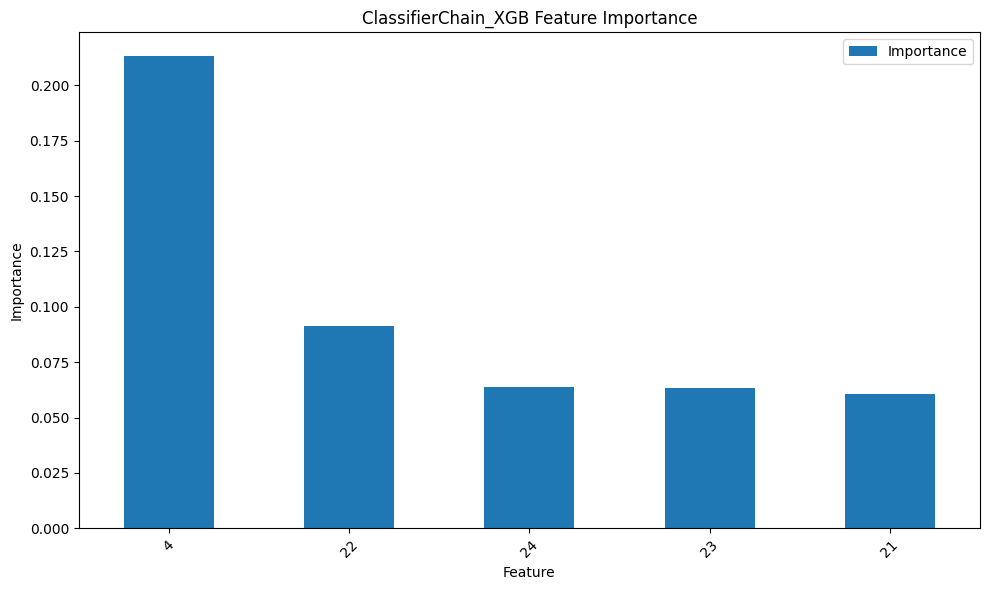

In [63]:
top_5 = importance_df.head(5)
top_5.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('ClassifierChain_XGB Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
br_model = best_models['BinaryRelevance_RF']['model']
print("Available attributes:", dir(br_model))

# getting feature importance for each label's classifier
importance_list = []
for classifier in br_model.classifiers_:
    if hasattr(classifier, 'feature_importances_'):
        importance_list.append(classifier.feature_importances_)

if importance_list:
    avg_importance = np.mean(importance_list, axis=0)

    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': avg_importance
    }).sort_values('Importance', ascending=False)

    print("\nBinaryRelevance_RF Feature Importance:")
    print(importance_df.to_markdown(index=False))
else:
    print("No feature importances available - classifiers may not support it")

Available attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_ensure_input_format', '_ensure_multi_label_from_single_class', '_ensure_output_format', '_estimator_type', '_generate_data_subset', '_generate_partition', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_tags', '_label_count', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'classifie

In [65]:
from sklearn.feature_selection import f_classif

f_values, _ = f_classif(X_train, y_train.iloc[:, 0])  # First label only
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'F-value': f_values
}).sort_values('F-value', ascending=False)

print("\nMLkNN Feature Importance (ANOVA F-values):")
print(importance_df.to_markdown(index=False))


MLkNN Feature Importance (ANOVA F-values):
|   Feature |      F-value |
|----------:|-------------:|
|         8 | 39.263       |
|         7 | 35.2035      |
|        17 | 34.6203      |
|        25 | 27.6481      |
|        13 | 26.8964      |
|        27 | 22.0678      |
|        15 | 20.8327      |
|         9 | 20.6506      |
|        16 | 18.5055      |
|        26 | 13.384       |
|        14 |  9.87274     |
|        10 |  8.41619     |
|         2 |  1.87934     |
|         1 |  1.13965     |
|        23 |  1.12998     |
|        20 |  0.845229    |
|        12 |  0.362776    |
|         0 |  0.30626     |
|         4 |  0.232131    |
|        24 |  0.223114    |
|        19 |  0.175268    |
|         6 |  0.14207     |
|         5 |  0.053785    |
|         3 |  0.044195    |
|        22 |  0.0382157   |
|        21 |  0.00685087  |
|        11 |  0.00195056  |
|        18 |  4.91305e-06 |


In [66]:
mo_model = best_models['MultiOutput_RF']['model']
avg_importance = np.mean([est.feature_importances_ for est in mo_model.estimators_], axis=0)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': avg_importance
}).sort_values('Importance', ascending=False)

print("\nMultiOutput_RF Feature Importance:")
print(importance_df.to_markdown(index=False))


MultiOutput_RF Feature Importance:
|   Feature |   Importance |
|----------:|-------------:|
|        11 |    0.0823647 |
|        22 |    0.0674901 |
|        20 |    0.0540744 |
|        18 |    0.0503685 |
|        12 |    0.0502296 |
|        19 |    0.0423096 |
|        21 |    0.0417985 |
|        17 |    0.0413325 |
|        25 |    0.0413308 |
|         7 |    0.0387414 |
|        23 |    0.0386338 |
|         8 |    0.0382425 |
|        26 |    0.0376822 |
|        24 |    0.0366369 |
|        27 |    0.0356637 |
|        15 |    0.0312321 |
|         9 |    0.0311274 |
|        13 |    0.0298429 |
|        10 |    0.0296831 |
|        16 |    0.0271161 |
|        14 |    0.0250911 |
|         4 |    0.0225819 |
|         2 |    0.0217346 |
|         0 |    0.0210554 |
|         5 |    0.0175161 |
|         3 |    0.0173677 |
|         1 |    0.0161249 |
|         6 |    0.0126273 |


In [67]:
ovr_model = best_models['OneVsRest_XGB']['model']
avg_importance = np.mean([est.feature_importances_ for est in ovr_model.estimators_], axis=0)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': avg_importance
}).sort_values('Importance', ascending=False)

print("\nOneVsRest_XGB Feature Importance:")
print(importance_df.to_markdown(index=False))


OneVsRest_XGB Feature Importance:
|   Feature |   Importance |
|----------:|-------------:|
|         4 |    0.113757  |
|        11 |    0.0699203 |
|        12 |    0.0624192 |
|        18 |    0.0592129 |
|        22 |    0.0473502 |
|         7 |    0.0472824 |
|        20 |    0.0464186 |
|         8 |    0.0422661 |
|        25 |    0.0396524 |
|        17 |    0.0389903 |
|        19 |    0.0366283 |
|        13 |    0.0363245 |
|        23 |    0.0331232 |
|        24 |    0.0321536 |
|        14 |    0.0320852 |
|        21 |    0.0319177 |
|        16 |    0.0249254 |
|        26 |    0.0248838 |
|        10 |    0.024764  |
|         9 |    0.022035  |
|         0 |    0.0217832 |
|        15 |    0.0209483 |
|         5 |    0.019729  |
|         2 |    0.0179436 |
|         1 |    0.0178957 |
|        27 |    0.0145319 |
|         3 |    0.0124131 |
|         6 |    0.0086449 |


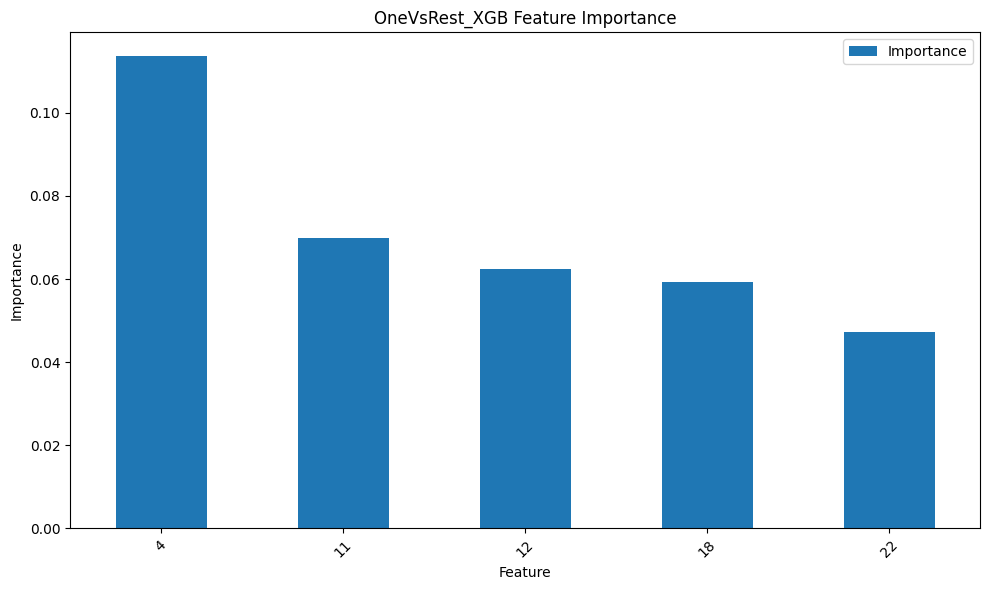

In [68]:
top_5 = importance_df.head(5)
top_5.plot(kind='bar', x='Feature', y='Importance', figsize=(10, 6))
plt.title('OneVsRest_XGB Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()